In [2]:
import numpy as py
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
img =cv2.imread('./test_image/krutik (3).jpg')
img.shape

(2472, 2436, 3)

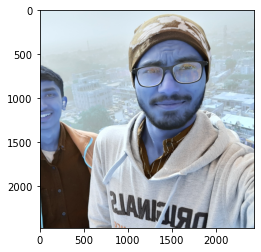

In [21]:
plt.imshow(img)

In [22]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(2472, 2436)

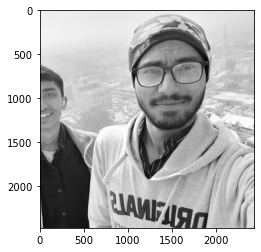

In [23]:
plt.imshow(gray,cmap='gray')

In [26]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[1193, 1442,  255,  255]], dtype=int32)

In [27]:
(x,y,w,h) = faces[0]
x,y,w,h

(1193, 1442, 255, 255)

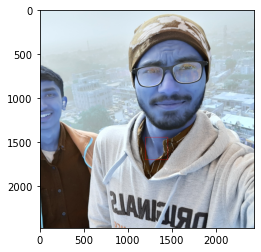

In [28]:
face_image= cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_image)

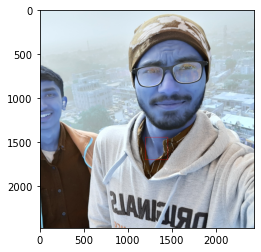

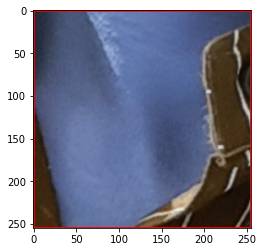

In [29]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_image = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_image,cmap='gray')
plt.show()
plt.imshow(roi_color,cmap='gray')

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img= cv2.imread(image_path)
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

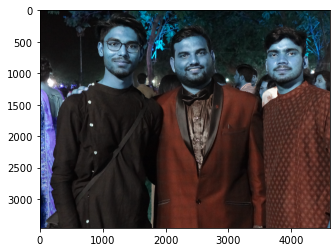

In [30]:
original_image = cv2.imread('./test_image/krutik (4).jpg')
plt.imshow(original_image)

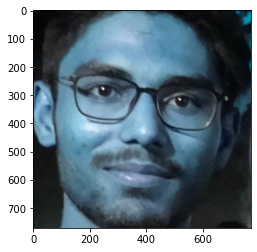

In [32]:
cropped_image=get_cropped_image_if_2_eyes('./test_image/krutik (4).jpg')
plt.imshow(cropped_image)

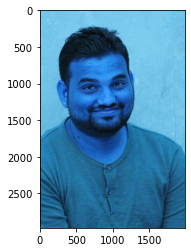

In [15]:
cropped_image_1_eye= cv2.imread('./test_image/jog1 .jpg')
plt.imshow(cropped_image_1_eye)

In [16]:
orr_image=get_cropped_image_if_2_eyes('./test_image/krutik (3).jpg')
orr_image

In [33]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [34]:
import os
img_dirs =[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [35]:
img_dirs

['./dataset/jogendra',
 './dataset/krutik',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/virat_kohli']

In [36]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [38]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    count=1
    celebrity_file_names_dict[celebrity_name] = [] 
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped image in ", cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            count+=1
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)

jogendra
generating cropped image in  ./dataset/cropped/jogendra
krutik
generating cropped image in  ./dataset/cropped/krutik
lionel_messi
generating cropped image in  ./dataset/cropped/lionel_messi
maria_sharapova
generating cropped image in  ./dataset/cropped/maria_sharapova
virat_kohli
generating cropped image in  ./dataset/cropped/virat_kohli


In [39]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [40]:
im_har = w2d(orr_image,'db1',5)
plt.imshow(im_har, cmap='gray')

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [76]:
class_dict = {}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count+=1
class_dict

{'jogendra': 0,
 'krutik': 1,
 'lionel_messi': 2,
 'maria_sharapova': 3,
 'virat_kohli': 4}

In [77]:
X = []
y = []
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_row_img = cv2.resize(img,(32,32))
        img_har = w2d(img, 'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_row_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [75]:
len(X)

168

In [78]:
len(X[0])

4096

In [79]:
32*32*4

4096

In [80]:
X[0]

array([[197],
       [206],
       [220],
       ...,
       [  6],
       [231],
       [ 40]], dtype=uint8)

In [81]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(148, 4096)

In [82]:
cropped_image_dirs

['./dataset/cropped/jogendra',
 './dataset/cropped/krutik',
 './dataset/cropped/lionel_messi',
 './dataset/cropped/maria_sharapova',
 './dataset/cropped/virat_kohli']

In [83]:
crelebrity_file_names_dit = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name]=file_list
celebrity_file_names_dict

{'jogendra': ['./dataset/cropped/jogendra\\jogendra1.png',
  './dataset/cropped/jogendra\\jogendra10.png',
  './dataset/cropped/jogendra\\jogendra11.png',
  './dataset/cropped/jogendra\\jogendra12.png',
  './dataset/cropped/jogendra\\jogendra14.png',
  './dataset/cropped/jogendra\\jogendra15.png',
  './dataset/cropped/jogendra\\jogendra16.png',
  './dataset/cropped/jogendra\\jogendra17.png',
  './dataset/cropped/jogendra\\jogendra2.png',
  './dataset/cropped/jogendra\\jogendra20.png',
  './dataset/cropped/jogendra\\jogendra21.png',
  './dataset/cropped/jogendra\\jogendra22.png',
  './dataset/cropped/jogendra\\jogendra24.png',
  './dataset/cropped/jogendra\\jogendra25.png',
  './dataset/cropped/jogendra\\jogendra26.png',
  './dataset/cropped/jogendra\\jogendra27.png',
  './dataset/cropped/jogendra\\jogendra28.png',
  './dataset/cropped/jogendra\\jogendra29.png',
  './dataset/cropped/jogendra\\jogendra3.png',
  './dataset/cropped/jogendra\\jogendra30.png',
  './dataset/cropped/jogendra\\

In [84]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [86]:
X_train.shape


(111, 4096)

In [87]:
X.shape

(148, 4096)

In [94]:
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.6756756756756757

In [95]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.73      0.89      0.80         9
           2       1.00      0.38      0.55         8
           3       0.86      1.00      0.92         6
           4       0.43      1.00      0.60         6

    accuracy                           0.68        37
   macro avg       0.80      0.70      0.65        37
weighted avg       0.82      0.68      0.65        37



In [96]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [97]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [98]:
best_estimators = {}
scores=[]
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=6, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.792885,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.594542,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.810916,{'logisticregression__C': 1}


In [99]:
best_estimators['svm'].score(X_test,y_test)

0.8918918918918919

In [100]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.7837837837837838

In [101]:
best_estimators['svm']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [102]:
best_clf= best_estimators['svm']
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[6, 0, 0, 0, 2],
       [0, 9, 0, 0, 0],
       [0, 1, 6, 0, 1],
       [0, 0, 0, 6, 0],
       [0, 0, 0, 0, 6]], dtype=int64)

Text(69.0, 0.5, 'Truth')

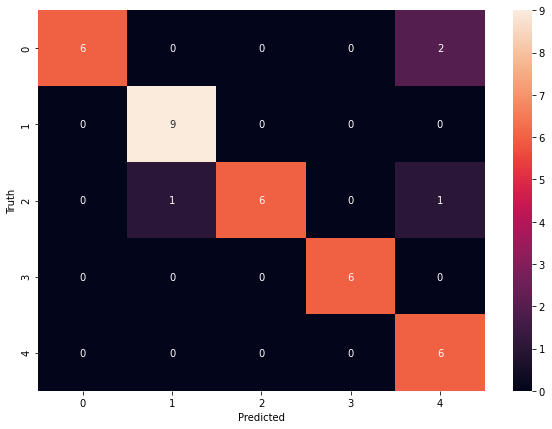

In [103]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [104]:
import joblib
joblib.dump(best_clf,"saved_model.pkl")

['saved_model.pkl']

In [105]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))